In [24]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from PIL.Image import core as _imaging
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image

In [25]:
our_data = pd.read_json('https://raw.githubusercontent.com/ajakaiye33/ngrnewscorpus/main/data/testy.jsonl',lines=True)

In [26]:
pd.set_option("display.max_rows",10000)

In [27]:
our_data

title  \
0     Nigeria’ll collapse in 6 months time, Robert C...   
1     Nigerian govt extends NIN-SIM registration til...   
2     Bill Gates’s daughter, Jennifer laments parent...   
3     How Bill, Melinda Gates met, married, divorced...   
4     BREAKING: FG again extends NIN deadline by 8 w...   
5     Jonathan advocates media freedom, responsible ...   
6     FG Extends NIN-SIM Linkage to June 30, as Enro...   
7     FG Moves to Curb Small Arms Influx, Establishe...   
8                          #MySARSStory: Out of Nowhere   
9                          #MySARSStory: Out of Nowhere   
10    Man sentenced for using dead mother's name to ...   
11    Newspaper Headlines: States broke, and bandits...   
12    Designing and building sustainable commercial ...   
13              The Next Wave: Emefiele and other risks   
14    Updated: Bandits threaten to kill 17 varsity s...   
15    Obaseki recommits to press freedom, charges jo...   
16                                     Web Story 19 Jan   
17        Dangote Cement to pay N40.3bn tax in Q1, 2021   
18              FG extends NIN-SIM linkage till June 30   
19                Importance Of World Press Freedom Day   
20    ANALYSIS: New Policy Fails To Reverse Gas Flar...   
21    Baby’s first stool can help predict risk of de...   
22    PDP’ll pressure Buhari’s govt to rescue Nigeri...   
23       Bill Gates announces divorce from wife Melinda   
24    Nigerian govt extends NIN-SIM registration til...   
25    Bill Gates’s daughter, Jennifer laments parent...   
26    How Bill, Melinda Gates met, married, divorced...   
27    BREAKING: FG again extends NIN deadline by 8 w...   
28    Jonathan advocates media freedom, responsible ...   
29    FG Extends NIN-SIM Linkage to June 30, as Enro...   
30    FG Moves to Curb Small Arms Influx, Establishe...   
31                         #MySARSStory: Out of Nowhere   
32                         #MySARSStory: Out of Nowhere   
33    FG to arraign 400 suspects arrested for fundin...   
34    Man sentenced for using dead mother's name to ...   
35    Designing and building sustainable commercial ...   
36              The Next Wave: Emefiele and other risks   
37    NIN-SIM Linkage: Federal government extends to...   
38    Obaseki recommits to press freedom, charges jo...   
39                                     Web Story 19 Jan   
40        Dangote Cement to pay N40.3bn tax in Q1, 2021   
41    Lawyers At WCTL Speak On Police Brutality In L...   
42    BREAKING: Federal Govt Extends NIN-SIM Linkage...   
43              FG extends NIN-SIM linkage till June 30   
44                Importance Of World Press Freedom Day   
45    ANALYSIS: New Policy Fails To Reverse Gas Flar...   
46    Abducted students: Allow more time for negotia...   
47    PDP’ll pressure Buhari’s govt to rescue Nigeri...   
48    Nigerian govt extends NIN-SIM registration til...   
49    Bill Gates’s daughter, Jennifer laments parent...   
50    Boko Haram infiltrates Bauchi councils, Borno ...   
51    BREAKING: FG again extends NIN deadline by 8 w...   
52    Jonathan advocates media freedom, responsible ...   
53    FG Extends NIN-SIM Linkage to June 30, as Enro...   
54    FG Moves to Curb Small Arms Influx, Establishe...   
55                         #MySARSStory: Out of Nowhere   
56                         #MySARSStory: Out of Nowhere   
57    Crisis Group to Buhari: Take livestock plan se...   
58    FG to arraign 400 suspects arrested for fundin...   
59    MTN Nigeria’s Q1 2021 results show it may be q...   
60    Designing and building sustainable commercial ...   
61    NIN-SIM Linkage: Federal government extends to...   
62    Obaseki recommits to press freedom, charges jo...   
63                                     Web Story 19 Jan   
64    Power sector revenue grows by 40% in three months   
65    Kungiyoyin Musulunci Sun Lalubo Bakin Zaren Wa...   
66    Tabbas Na Kai Wasu ‘Yan Kwangila Wurin Buhari ...   
67              FG extends NIN-SIM lin

In [28]:
our_data[(our_data['text'].str.contains('Haram')) & (our_data['text'].str.contains('Boko'))]

title  \
7     FG Moves to Curb Small Arms Influx, Establishe...   
14    Updated: Bandits threaten to kill 17 varsity s...   
30    FG Moves to Curb Small Arms Influx, Establishe...   
33    FG to arraign 400 suspects arrested for fundin...   
50    Boko Haram infiltrates Bauchi councils, Borno ...   
54    FG Moves to Curb Small Arms Influx, Establishe...   
58    FG to arraign 400 suspects arrested for fundin...   
81    Boko Haram infiltrates Bauchi councils, Borno ...   
89    Insecurity, secessionist agitations: Listen to...   
91    FG Moves to Curb Small Arms Influx, Establishe...   
92    Bandits Threaten to Kill Abducted Greenfield U...   
94    Bauchi Raises the Alarm over Influx of Bandits...   
101   FG to arraign 400 suspects arrested for fundin...   
111   Updated: Bandits threaten to kill 17 varsity s...   
148   Insecurity: Service Chiefs to brief Senate on ...   
162   Insecurity, secessionist agitations: Listen to...   
164   FG Moves to Curb Small Arms Influx, Establishe...   
165   Bandits Threaten to Kill Abducted Greenfield U...   
167   Bauchi Raises the Alarm over Influx of Bandits...   
173   Insecurity: Service chiefs will appear before ...   
184   Insecurity: Wike asks FG, ‘Where are the arms ...   
185   Nigeria should break up before 2023 says Pasto...   
192   Buhari’s ‘nepotism’ fuelling agitations for se...   
198   Bandits Invade Bauchi Communities, Vandalise M...   
220                       Pay ransom, take action later   
236   FG Moves to Curb Small Arms Influx, Establishe...   
237   Bandits Threaten to Kill Abducted Greenfield U...   
243   BREAKING: Mother Confirms Bandits Released One...   
264   Buhari’s ‘nepotism’ fuelling agitations for se...   
288   Terrorists involved in Kaduna students abducti...   
291   #Greenfielduniversity: Tension as Nigerians aw...   
296   Boko Haram kidnapped Greenfield students not b...   
310   FG Moves to Curb Small Arms Influx, Establishe...   
311   Bandits Threaten to Kill Abducted Greenfield U...   
338   Buhari’s ‘nepotism’ fuelling agitations for se...   
345   Insecurity: Federal Govt Accuses PDP Of Playin...   
362   Terrorists involved in Kaduna students abducti...   
371   Boko Haram kidnapped Greenfield students not b...   
383   FG Moves to Curb Small Arms Influx, Establishe...   
384   Bandits Threaten to Kill Abducted Greenfield U...   
390   Give Bandits N100million, 10 Motorcycles To Fr...   
415   Buhari’s ‘nepotism’ fuelling agitations for se...   
446   Boko Haram responsible for Greenfield students...   
463   FG Moves to Curb Small Arms Influx, Establishe...   
464   Bandits Threaten to Kill Abducted Greenfield U...   
491   Buhari’s ‘nepotism’ fuelling agitations for se...   
525   Senator Ndume raises alarm, claims Boko Haram ...   
526                      Southsouth in eye of the storm   
537   FG Moves to Curb Small Arms Influx, Establishe...   
538   Bandits Threaten to Kill Abducted Greenfield U...   
589   CBN should pay N100m Greenfield students’ rans...   
599   Senator Ndume raises alarm, claims Boko Haram ...   
608   Dozen feared killed in B’Haram repeat attack i...   
611   FG Pledges to Save Abducted Kaduna Varsity Stu...   
663   South South govs, PANDEF blast Lai Mohammed ov...   
664   KIDNAPPED AFAKA 29, GREENFIELD 16 STUDENTS: An...   
668   Greenfield students: Tension, anxiety as bandi...   
669   Kwara Assembly wants death penalty for kidnappers   
670       Osun: Police warns against 'unlawful protest'   
671         Buhari govt to cut civil servants' salaries   
672   2023 presidency: Tinubu won't survive the heat...   
681   Dozen feared killed in B’Haram repeat attack i...   
684   FG Pledges to Save Abducted Kaduna Varsity Stu...   
692   We Won't Overthrow Buhari Government—Nigerian ...   
742   Pay N100m ransom for Greenfield students now, ...   
757   Dozen feared killed in B’Haram repeat attack i...   
760   FG Pledges to Save Abducted Kaduna Varsity Stu...   
764   Buhari, El-Rufai Insensitive To 

In [29]:
today = datetime.now()


In [30]:
def todays_headline(df,col):
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] == get_date
    filter_keyword = df.iloc[:,0]
    show_keywords_today = filter_keyword[filter_today].unique()
    return show_keywords_today

In [31]:
todays_headline(our_data,'scraped_date')

array(['#SoundSultan: What you should know about throat cancer',
       'Experts call for new building standards to combat airborne disease',
       'Organise national dialogue to address agitations for restructuring, secession',
       'Nigeria to revive Special Terrorism Prosecution Courts, probes Boko Haram sponsors',
       'Ohanaeze Ndigbo president assures Sanwo-Olu',
       'Four reportedly shot dead as Customs clash with smugglers in Oyo [PHOTOS]',
       'New security measures for Southeast, South-south will fuel disintegration',
       'How to win the war on insecurity',
       'World Press Freedom Day: When journalism is threatened, democracy is at stake',
       'Appraising Sanwo-Olu’s poverty alleviation initiatives',
       'Row over South’s governors call for dialogue, restructuring',
       'Buhari, Kalu, Lalong, Ortom, others mourn as ex-CDS, Dogonyaro, dies at 80',
       'North preparing to leave Nigeria –Ladoja',
       'IPOB threat: Ohanaeze asks Sanwo-Olu to ignor

In [32]:
def todays_keywords(df,col):
    all_keyword_today = []
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] == get_date
    filter_keyword = df.iloc[:,-1]
    show_keywords_today = filter_keyword[filter_today]
    for news in show_keywords_today:
        for key_words in news:
            all_keyword_today.append(key_words)
    today_text = ",".join(all_keyword_today)
    return today_text

In [33]:
todayz = todays_keywords(our_data,'scraped_date')


In [34]:
def alltime_keywords(df,col):
    all_keyword_alltime = []
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] != get_date
    filter_keyword = df.iloc[:,-1]
    show_keywords_today = filter_keyword[filter_today]
    for news in show_keywords_today:
        for key_words in news:
            all_keyword_alltime.append(key_words)
    full_text = ",".join(all_keyword_alltime)
    return full_text

In [35]:
all_time = alltime_keywords(our_data,'scraped_date')


In [36]:
import random

In [37]:
def viz_word(period):
    png = ['./img/nig-flag.png','./img/map-nig2.png']
    path_png = random.choices(png,k=1)[0]
    background = np.array(Image.open(path_png))
    wrdcld = WordCloud(width=400, height=200, background_color='white',mode='RGBA',mask=background).generate(period)
    image_col = ImageColorGenerator(background)
    plt.figure(figsize=[20,20])
    plt.imshow(wrdcld.recolor(color_func=image_col),interpolation='bilinear')
    plt.axis("off")
    return plt.show()


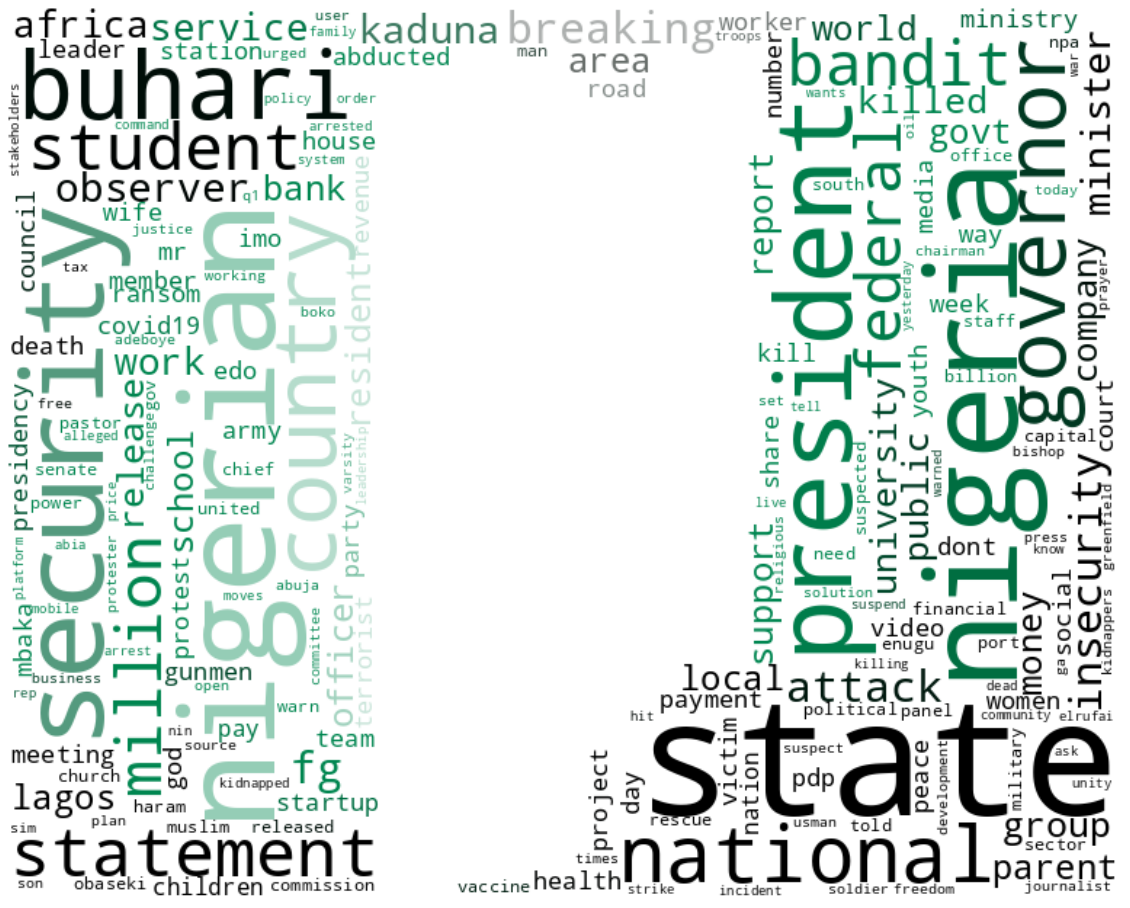

In [38]:
viz_word(all_time)
